# Plotting Basic Curve and then Playing it

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import os
import copy
import math
import simpleaudio as sa
import sounddevice as sd
import time
import cmath
import IPython

In [2]:
print(os.getcwd())

D:\Work\Jupyter Notebook\DSP


Changing the format of the Plot using rcParams

In [3]:
plt.rcParams["figure.figsize"] = (20,6)
np.set_printoptions(threshold=np.inf)

wavefile.read(<file>) reads the wav file and returns a tuple of Sampling Rate and the numpy array of wav audio.<br>
Matplotlib plots the array to visualize the sound.<br>
X axis is Scaled Time while the Y axis shows the Amplitude of the sound.<br>

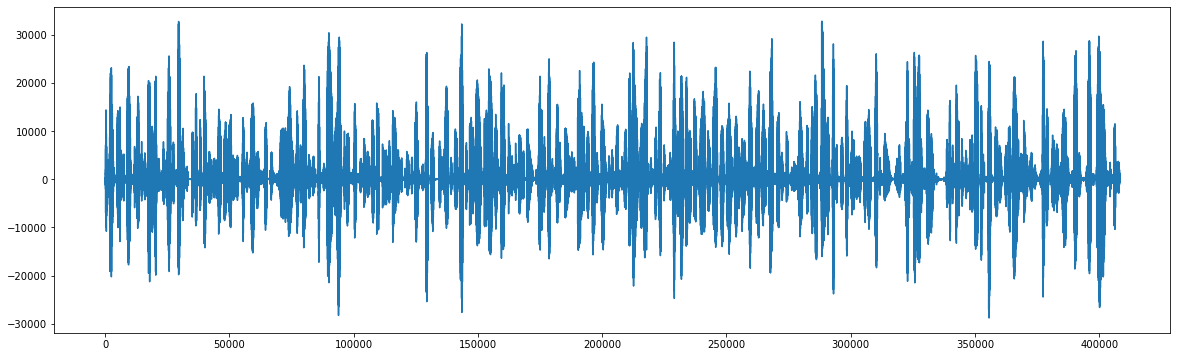

In [4]:
rate, s = wavfile.read('recording.wav')
plt.plot(s)

In [5]:
print(rate)

8000


In [6]:
print(len(s))
print(type(s))
print(s.flags)

408226
<class 'numpy.ndarray'>
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [7]:
arr = copy.deepcopy(s)

This is an attempt to create a sound with sinusoidal wave.<br>
<b>rate</b> is the Sampling Rate of the wav file.<br>
<b>Frequency</b> is the desired frequency of the audio.<br>
<b>Length</b> is the length of audio file in sec.

In [8]:
swave = []
rate = 1000
frequency = 50
length = 1

In [9]:
for j in range(1, length + 1):
    for i in range(rate):
        swave.append(math.sin(2 * math.pi * frequency * (i / rate)))
print(len(swave))

1000


wavfile.write("File Name", "Sampling Rate", "Data") is used to write the array to an audio file.<br>
<b>File Name</b> is the name of file. The file must be in wav format.<br>
<b>Sampling Rate</b> is the sampling rate of the output audio. This is to<br>
be set keeping in mind the required sampling rate of the output.<br>
<b>Data</b> is the numpy array containg the output data.

In [10]:
wavfile.write("recorded.wav", rate, np.array(swave))

The <b>sounddevice</b> library is used to directly play the numpy array without saving it as wav file.<br>
<b>sd.play("data", "Sampling Rate")</b>
<b>Data</b> is the numpy array to be played<br>
<b>Sampling Rate</b> is the sampling rate at which the file has to be played. It should be chosen with care.<br>
<i>It is advisable to halt all other operations till the playback is complete, otherwise unexpected sounds occur. For this the time.sleep is used to halt execution till play back is complete.</i> 

sd.play(swave, rate)
time.sleep(length + 0.5)
sd.stop()

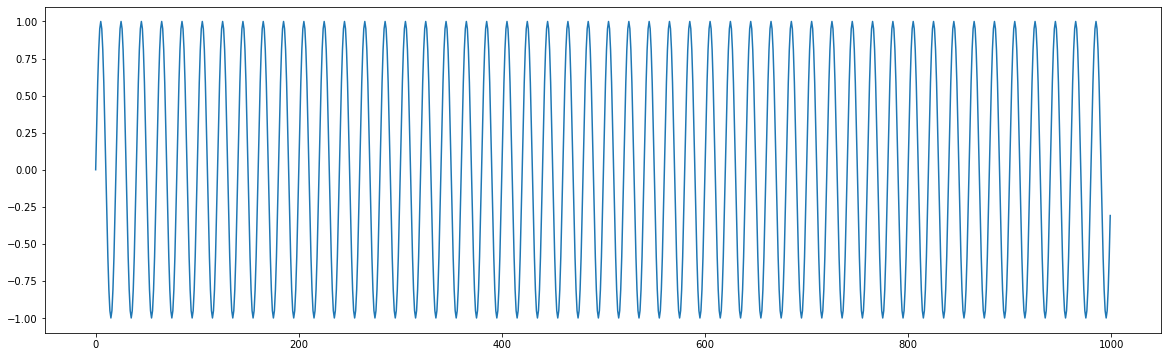

In [11]:
plt.plot(swave)

# Basics Of DFT

<ipython-input-12-f73aa2cd3dd2>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.array(swave))


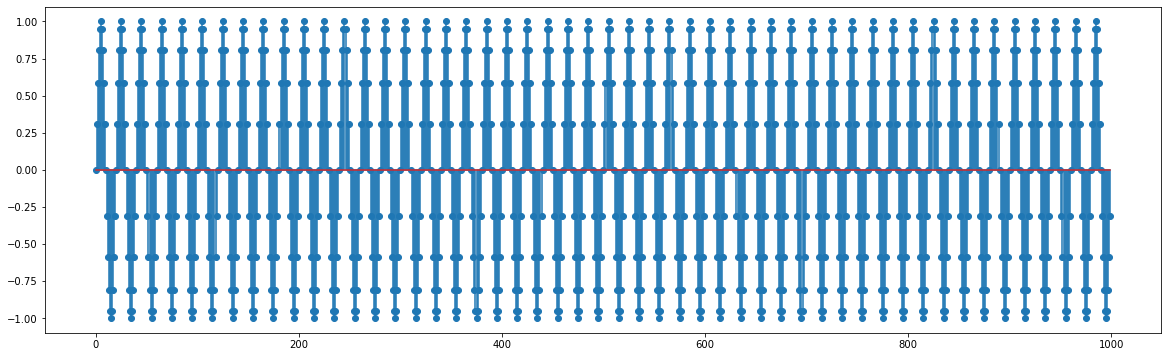

In [12]:
plt.stem(np.array(swave))
IPython.display.Audio(swave, rate=rate)

<ipython-input-13-6dc77a77eda2>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(abs(fft))


50
950


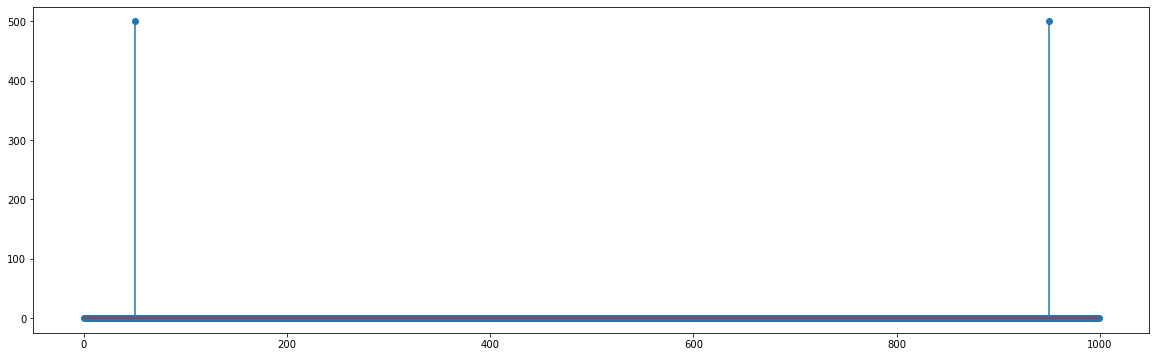

In [13]:
fft = np.fft.fft(swave)
fft.real[abs(fft.real) < 1e-10] = 0
fft.imag[abs(fft.imag) < 1e-10] = 0
plt.stem(abs(fft))
for i in range(len(fft)):
    if abs(fft[i]) != 0:
        print(i)

<ipython-input-14-9cb2d03b20ee>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(fft.real)


<StemContainer object of 3 artists>

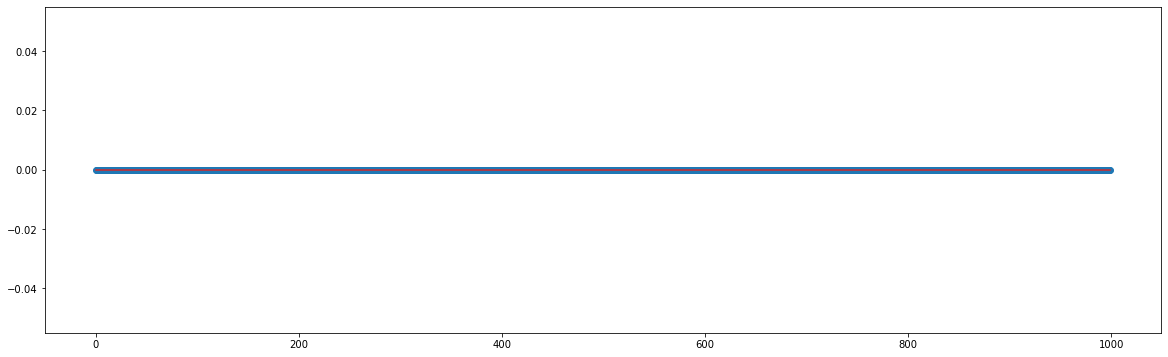

In [14]:
plt.stem(fft.real)

<ipython-input-15-861453c4b36f>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(fft.imag)


<StemContainer object of 3 artists>

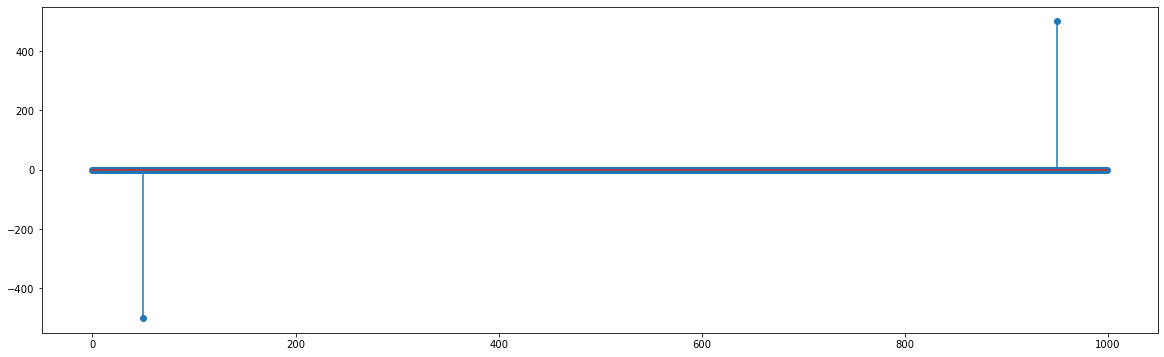

In [15]:
plt.stem(fft.imag)

<ipython-input-16-133378b17e43>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(mag)


<StemContainer object of 3 artists>

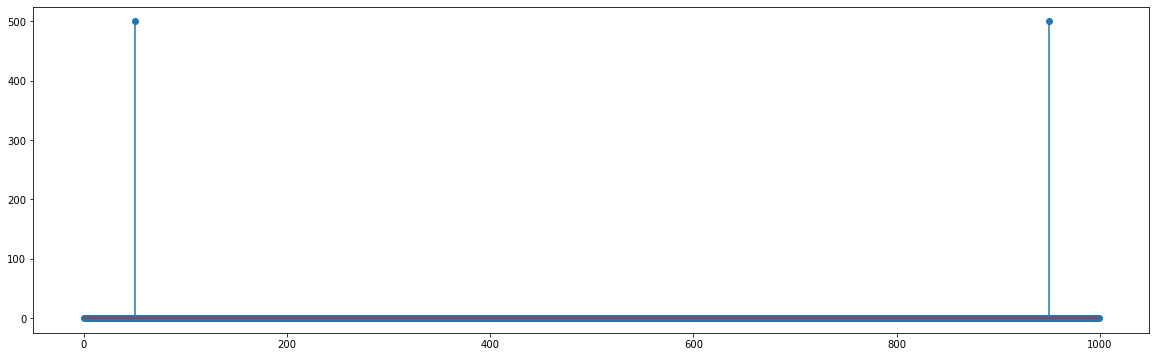

In [16]:
mag = [abs(value) for value in fft]
plt.stem(mag)

<ipython-input-17-9c65eedfcbd3>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(phase)


<StemContainer object of 3 artists>

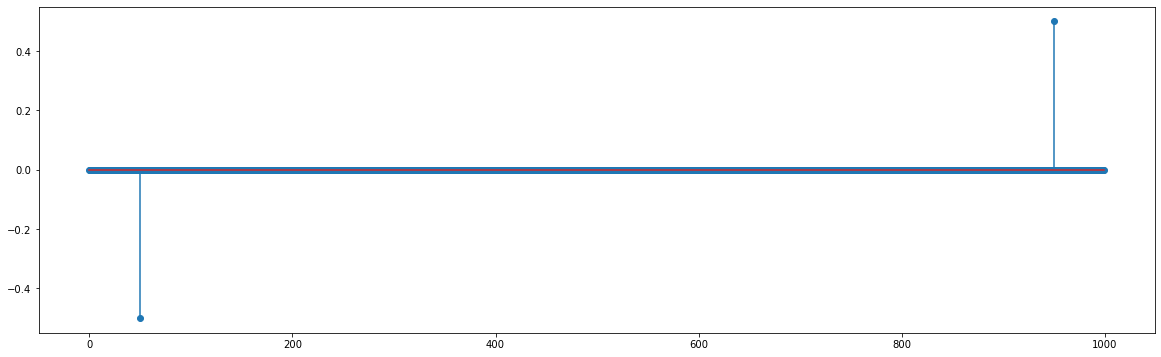

In [17]:
phase = [cmath.phase(value) / math.pi for value in fft]
plt.stem(phase)

<ipython-input-18-672c0dc38584>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(abs(fft))


<StemContainer object of 3 artists>

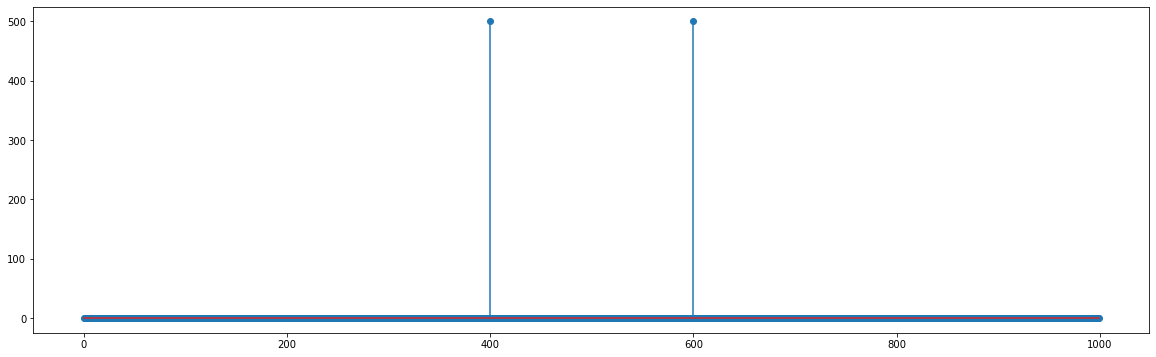

In [18]:
m1 = fft[50]
m2 = fft[950]
fft[950] = fft[50] = complex(0,0)
fft[400] = m1
fft[600] = m2
plt.stem(abs(fft))

<ipython-input-19-5a5af32a34d4>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ifft)
C:\Users\madhu\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\madhu\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\madhu\AppData\Roaming\Python\Python38\site-packages\IPython\lib\display.py:157: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


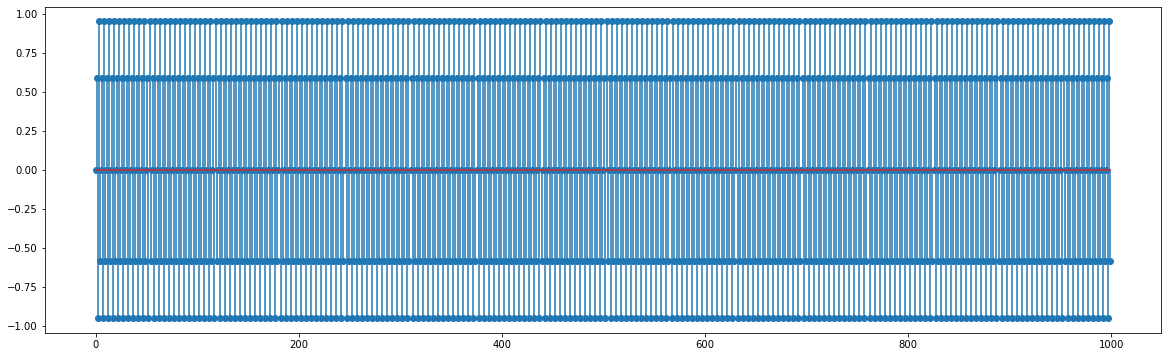

In [19]:
ifft = np.fft.ifft(fft)
plt.stem(ifft)
IPython.display.Audio(ifft, rate=rate)

# Fast Fourier Transform Basics

In [20]:
rate, s = wavfile.read('recording.wav')
IPython.display.Audio(s, rate=rate)

8000


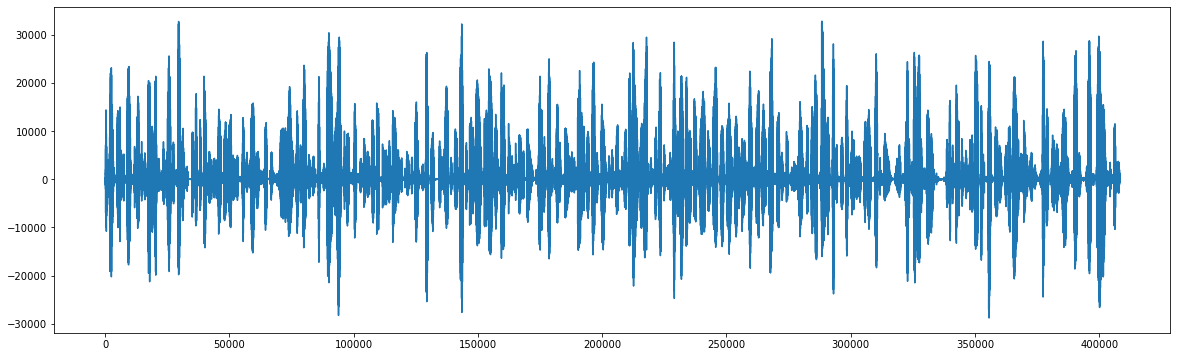

In [21]:
plt.plot(s)
print(rate)

In [22]:
len(s)

408226

<ipython-input-23-1b64185e9b76>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(snap)


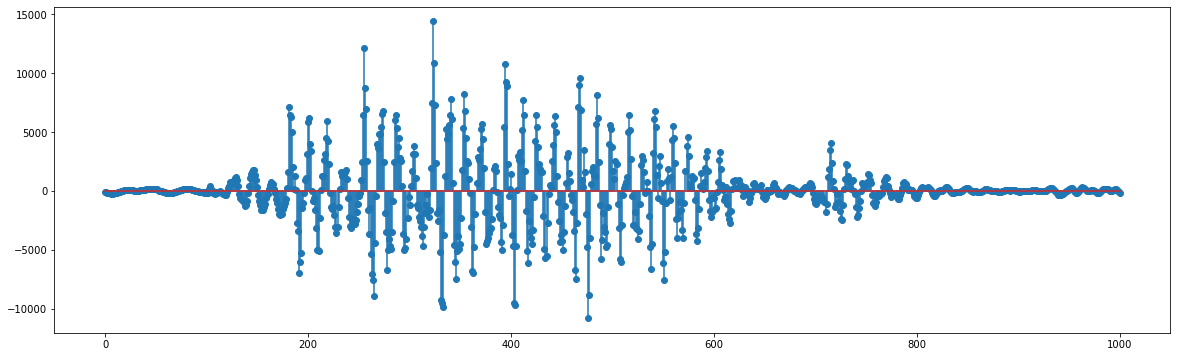

In [23]:
snap = s[0:1001]
plt.stem(snap)
IPython.display.Audio(snap, rate=rate)

<ipython-input-24-98a81752ae08>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(fft)
C:\Users\madhu\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\madhu\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

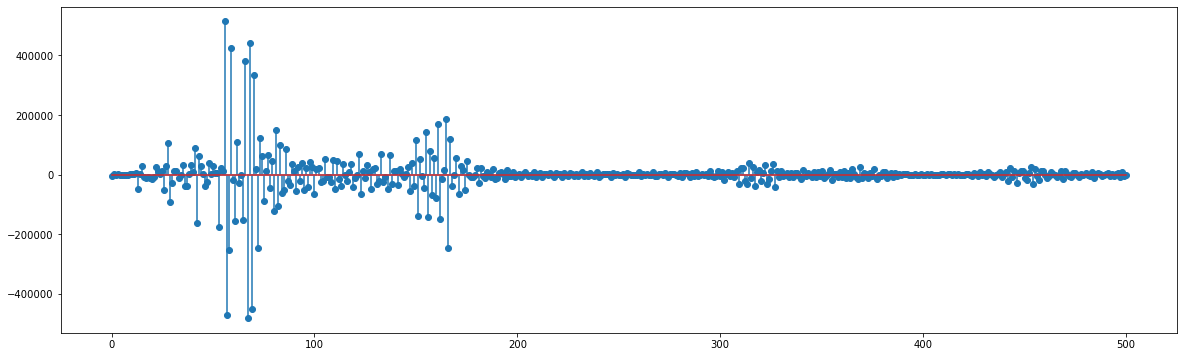

In [24]:
fft = np.fft.rfft(snap)
plt.stem(fft)

<ipython-input-25-c2f196b962f4>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(fft)
C:\Users\madhu\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

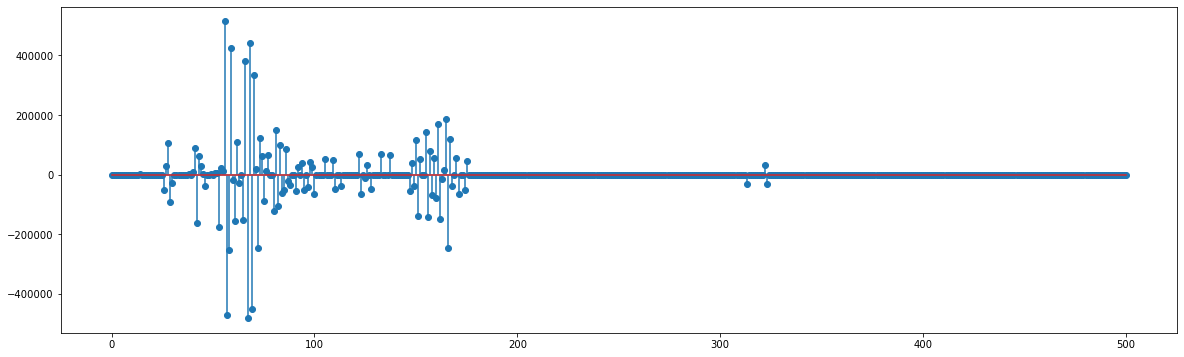

In [25]:
fft[abs(fft) < 50000] = 0
plt.stem(fft)

<ipython-input-26-7023bb904c25>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(fftn)
C:\Users\madhu\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

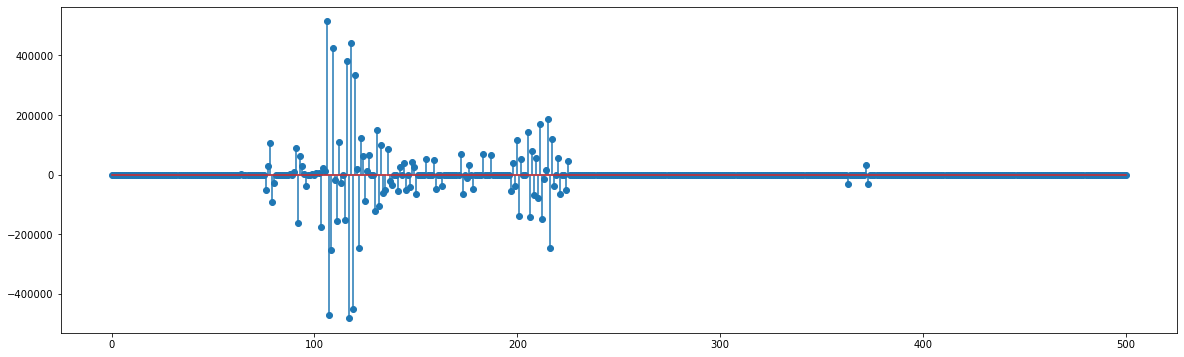

In [26]:
fftn = np.roll(fft, 50)
plt.stem(fftn)

In [27]:
IPython.display.Audio(np.fft.irfft(fft), rate=rate)

<ipython-input-28-19be78c5d529>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ifft)


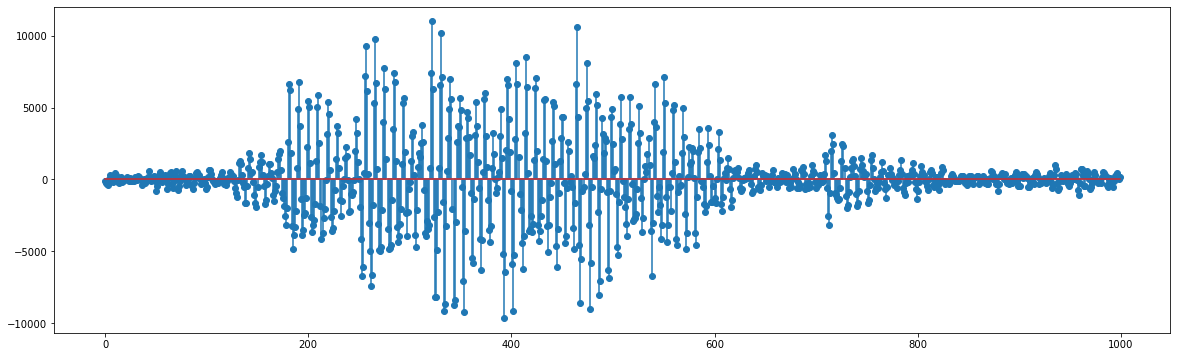

In [28]:
ifft = np.fft.irfft(fftn)
plt.stem(ifft)
IPython.display.Audio(ifft, rate=rate)

# Full Audio Processing

In [29]:
rate, s = wavfile.read('recording.wav')
IPython.display.Audio(s, rate=rate)

In [30]:
final = []
for i in range(0, len(s), 1000):
    snap = s[i:i + 1000]
    fft = np.fft.rfft(snap)
    shift = 30
    fftn = np.roll(fft, shift)
    fftn[0:shift] = 0
    ifft = np.fft.irfft(fftn)
    final.extend(list(ifft))
IPython.display.Audio(np.array(final), rate=rate)